# Mall Customers Clustering by K-Means Cluster Analysis

The aim of this project is to group mall customers by K-Means Cluster Analysis.

Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

plt.style.use('fivethirtyeight')

Load the dataset

In [2]:
df = pd.read_csv('dataset/mall_customer.csv')
df.head()

,cust_id,gender,age,income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Drop column "cust_id", because it does not contain meaningful information in this analysis

In [3]:
df = df.drop(['cust_id'], axis=1)
df.head()

,gender,age,income,spend_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


There is a categorical column in our data, namely the "gender" column, therefore we first encode it using a Label Encoder

In [4]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

Generate the descriptive statistics of the dataset

In [5]:
df.describe()

,gender,age,income,spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Calculate pairwise correlation of columns

In [6]:
df.corr()

,gender,age,income,spend_score
gender,1.000000,0.060867,0.056410,-0.058109
age,0.060867,1.000000,-0.012398,-0.327227
income,0.056410,-0.012398,1.000000,0.009903
spend_score,-0.058109,-0.327227,0.009903,1.000000


Visualization of customer gender using a pie chart

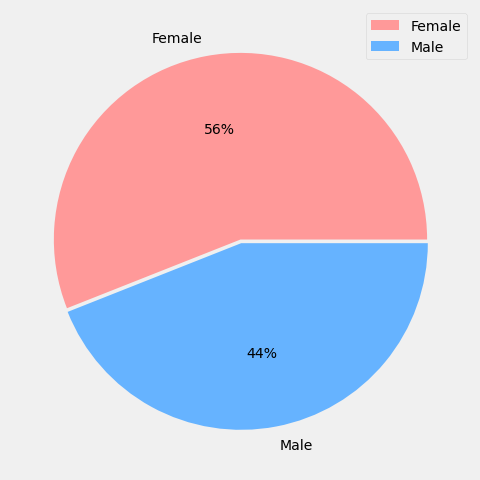

In [7]:
label = 'Female', 'Male'

plt.figure(figsize=(20,8))
plt.pie(df.gender.value_counts(), labels=label, autopct='%.0f%%', colors=['#ff9999','#66b3ff'], explode=(0, 0.02))
plt.legend(label)
plt.show()

It is known that the number of female customers is more than male customers with a difference of 12%

Selecting the optimal number of *k* using the elbow method

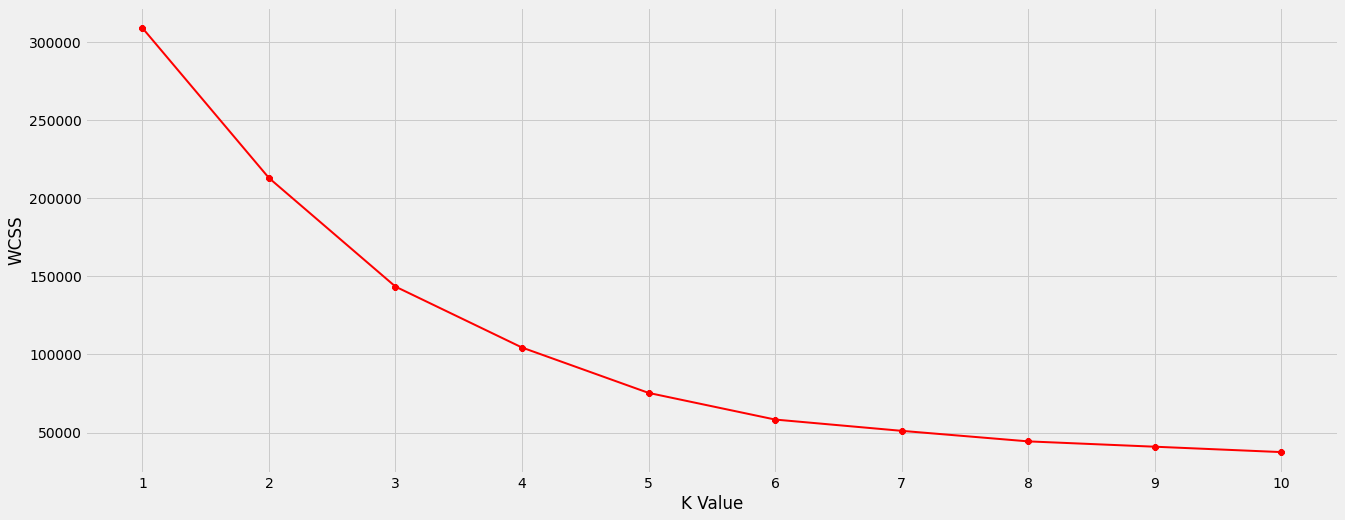

In [8]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:, 1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

It is known that the optimal value is obtained at *k*= 5.

Next, build a k-means model with a value of *k*= 5

In [9]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df['label'] = clusters

Visualization of clustering results

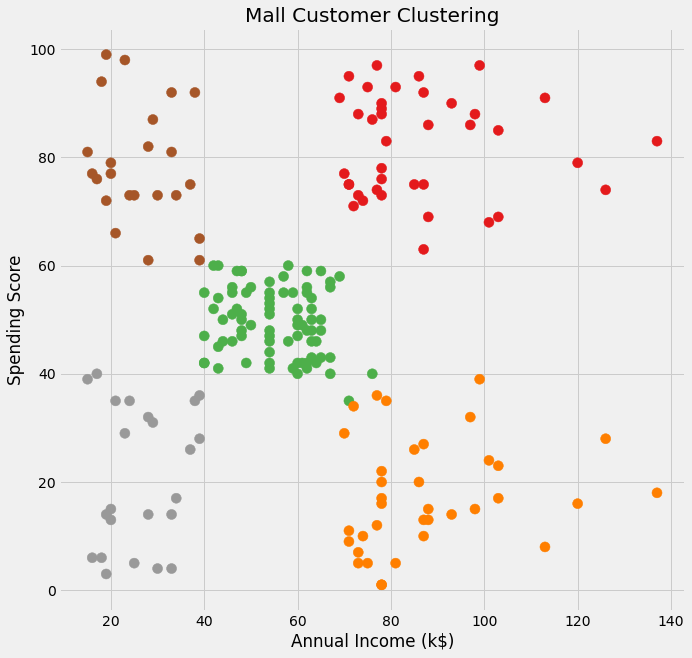

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df['income'], df['spend_score'], c=df['label'], cmap='Set1', s=100)
plt.title('Mall Customer Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

## Conclusion

Mall customers segmentation has been successfully carried out using K-Means Clustering Analysis. From 200 samples of mall customer data consisting of gender, age, annual income, and spending score, it has been successfully grouped into five types of customers. Based on the visualization performed on the cluster results, it is known that the grey cluster is the customer who has the lowest spending score and annual income, while orange cluster is the customer who has the highest spending score and annual income.